<a href="https://colab.research.google.com/github/nccreang/imped2drt/blob/master/Impedance_drt_plots_ncc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook prepared by Nicole Creange 

Contact email: nccreang@ncsu.edu

In [1]:
nbtype = !python -c "import google.colab" 2>/dev/null; echo $?
if not int(nbtype[0]):
    !git clone https://github.com/nccreang/imped2drt.git
    !cp -r imped2drt/* .

Cloning into 'imped2drt'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 19 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.


In [0]:
import os
import glob
import numpy as np
import back_functions as bf
import matplotlib.pyplot as plt
import KKlib
import pyDRT
import lsq_lin

This section will load the data files you have uploaded into the colab notebook. 

  Change the string in the first line to a common name of all the files you wish to analyze. In line 3, change the string to the character that separates names in a filename, Ex: sample_100C_1AC_0DC.txt, line 3 would have '_'. Change the delimiter in ine 4 for your particular file type. Ex: .csv --> ',' ; .txt --> '\t'

In [3]:
filenames = sorted(glob.glob('*C.csv')) # Data file common name 
print(filenames) # To see all files that are being pulled 
imped  = [np.loadtxt(f,delimiter=',') for f in filenames]  

['16May18_BTO2-1_middeg_1AC_35DC_165C.csv', '16May18_BTO2-1_middeg_1AC_35DC_170C.csv', '16May18_BTO2-1_middeg_1AC_35DC_175C.csv', '16May18_BTO2-1_middeg_1AC_35DC_180C.csv', '16May18_BTO2-1_middeg_1AC_35DC_185C.csv']


This section will convert the data files found above from Z* or Y* into Z* and into distribution of relaxation times. 

Change the data_type variable to either 'Z' or 'Y' to indicate the initial formalism of the data. Data must be formatted with [freq, Z', Z"] or [freq, Y', Y"].

KKT: kramer kronig transformation can be turned off or on by setting KKT= to False or True.

drt: distribution of relaxation times analysis, set to True or False, default is True.

L: include inductance in DRT calculation, set to 0 for not including or 0 for including inductance, default is 0.

clean:  remove data points from the analysis that the KKT does not match the data value within the threshold percentage (thres). Default is False.

thres:  threshold percentage for removing data points.  Values can range between 0 and 1, 0.2 --> KKT value more than 20% of the data value will be neglected. Default is 0.2.

save:  option to save figures or not, set to True or False, default is False. 

  0%|          | 0/5 [00:00<?, ?it/s]

['16May18_BTO2-1_middeg_1AC_35DC_165C', '16May18_BTO2-1_middeg_1AC_35DC_170C', '16May18_BTO2-1_middeg_1AC_35DC_175C', '16May18_BTO2-1_middeg_1AC_35DC_180C', '16May18_BTO2-1_middeg_1AC_35DC_185C']
-26640580.038735304


 20%|██        | 1/5 [00:04<00:16,  4.05s/it]

-26640580.038735304


 40%|████      | 2/5 [00:08<00:12,  4.11s/it]

-26640580.038735304


 60%|██████    | 3/5 [00:12<00:08,  4.06s/it]

-26640580.038735304


 80%|████████  | 4/5 [00:16<00:04,  4.07s/it]

-26640580.038735304


100%|██████████| 5/5 [00:20<00:00,  4.10s/it]


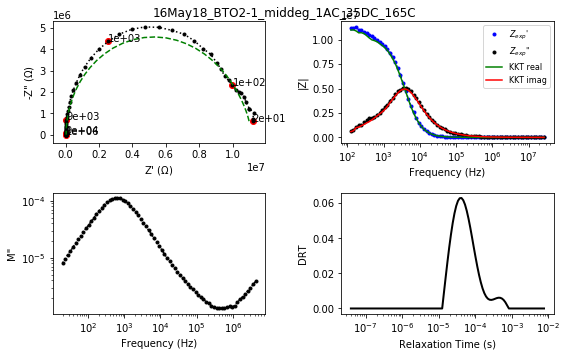

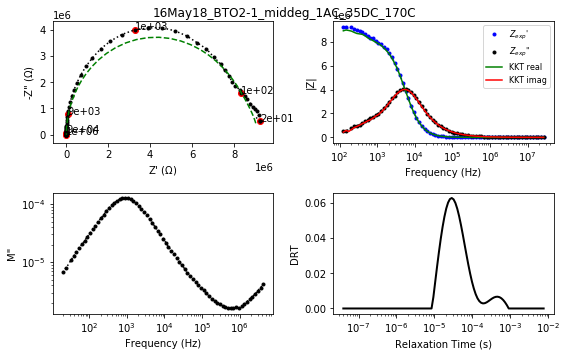

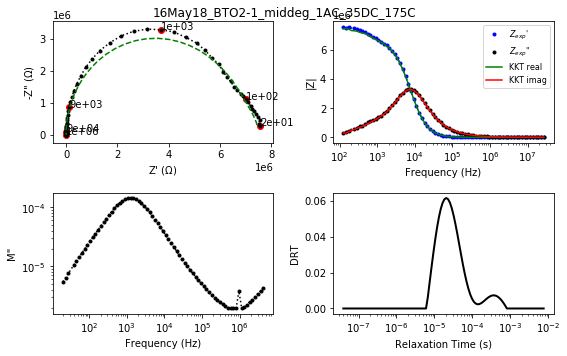

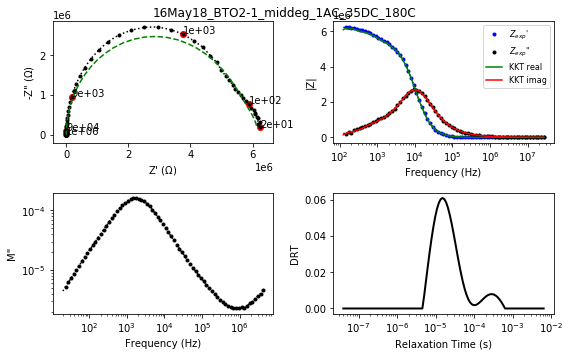

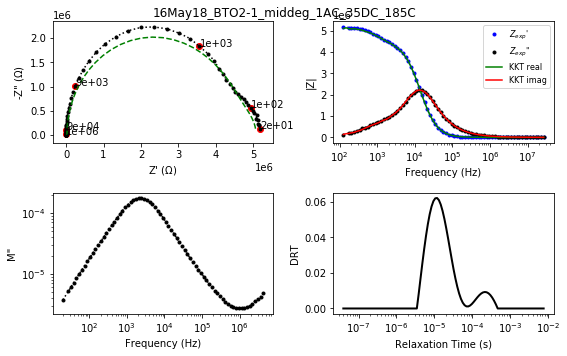

In [4]:
N = 0
impeds = []
im = np.zeros((len(imped[0][N:,0]),3))
for ii in range(len(imped)):
    im[:,0] = imped[ii][N:,0]
    im[:,1] = imped[ii][N:,1]
    im[:,2] = imped[ii][N:,2]
    impeds.append(im)
    im=np.zeros((len(imped[0][N:,0]),3))
data1 = impeds[:]
files = [os.path.splitext(ii)[0] for ii in filenames[:]]
print(files)
    
dims = [0.258,0.7] # area in cm^2, distance between electrodes in cm
fulldata,DRT_data,A_matricies = bf.bash_load(data1,files,dims,KKT=True,drt=True,data_type='Z',L=0,clean=True,thres=0.2)


This section will create a plot of all the data sets in: cole-cole, imaginary modulus, and distribution of relaxation times. 

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


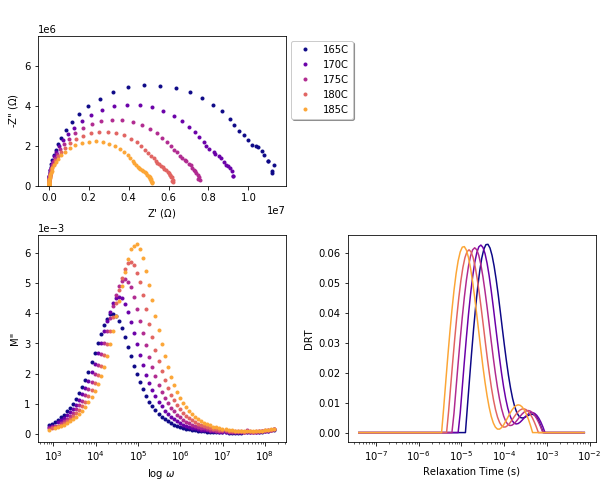

In [5]:
R_est=[]
C_est=[]
Csp = []
tau_vals = []
t = []
for ii in range(len(fulldata)):
    rest,cest,tau_val = bf.DRT_estimate(DRT_data[ii],fulldata[ii][:,1],fulldata[ii][:,0])
    R_est.append(rest)
    C_est.append(cest)
    tau_vals.append(tau_val)
    temp = files[ii].split('_')[-1]
    t.append(temp)

from matplotlib.pyplot import cm
color = iter(cm.plasma(np.linspace(0,1,len(fulldata)+1)))
fig1,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,8))
ax[0,1].axis('off')
for ii in range(0,len(fulldata)):
    data = fulldata[ii]  #Note: make sure to call out which data set you are going to use for the rest of the analysis
    c = next(color)
    jj=ii-2
    name = t[ii]
    w = data[:,0]*2*np.pi
    M_exp = 1j*w*data[:,1]*8.85e-14*dims[0]/dims[1]
    ax[0,0].plot(data[:,1].real,-data[:,1].imag,'.',c=c,label=name)
    ax[1,0].semilogx(w,M_exp.imag,'.',c=c,label=name)
    ax[0,0].ticklabel_format(style='sci',axis='y',scilimits=(0,0))
    ax[0,0].ticklabel_format(style='sci',axis='x',scilimits=(0,0))
    ax[1,0].ticklabel_format(style='sci',axis='y',scilimits=(0,0))
    ax[1,1].semilogx(DRT_data[ii]['tau'],DRT_data[ii]['beta'],c=c)
    ax[0,0].set_ylabel('-Z" ($\Omega$)')
    ax[0,0].set_xlabel("Z' ($\Omega$)")
    ax[1,0].set_ylabel('M"')
    ax[1,0].set_xlabel('log $\omega$')
    ax[1,1].set_ylabel('DRT')
    ax[1,1].set_xlabel('Relaxation Time (s)')
    ax[0,0].axis('square')

ax[0,0].set_ylim([0,max(fulldata[0][:,1].real)/1.5])
lgd=ax[0,0].legend(ncol=1,bbox_to_anchor=(1,1), loc="upper left",shadow=True)
fig1.subplots_adjust(wspace=0.25,hspace=0.1)
